In [1]:
import voronify

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import matplotlib.patches as patches

In [3]:
import numpy as np
import random
from math import sqrt, e, pi, cos, sin, ceil
from itertools import product
import re
import shapely
from shapely import Polygon
from shapely.affinity import scale, translate
from itertools import cycle

In [4]:
from scipy.optimize import linear_sum_assignment

In [5]:
rng = np.random.default_rng()

In [6]:
icon_logo = {"include_paths" : [
"""<path id="shape0" transform="translate(0, 128.245412844037)" fill="none" stroke="#ff8b26" stroke-width="0.93" stroke-linecap="square" stroke-linejoin="bevel" d="M0 254.676L0 0L114.332 1.20986L116.147 253.466Z" sodipodi:nodetypes="ccccc"/>""",
"""<path id="shape1" fill="none" stroke="#ff8b26" stroke-width="0.93" stroke-linecap="square" stroke-linejoin="bevel" d="M115.542 113.122L0 113.122L4.125 87.8601L18.7529 52.629L36.2959 32.6663L55.0487 16.9381L71.9868 7.86411L89.4375 2.625L115.125 0Z" sodipodi:nodetypes="cccccccccc"/>""",
"""<path id="shape2" transform="translate(132.689991941476, 0)" fill="none" stroke="#ff8b26" stroke-width="0.93" stroke-linecap="square" stroke-linejoin="bevel" d="M0 189.495L3.075 151.17L15.81 113.625L32.31 84L52.185 59.625L82.185 33.375L113.31 17.25L143.31 6.375L162.154 2.4375L191.317 0L219.716 2.625L242.404 7.40625L260.872 13.6875L286.537 25.6875L230.865 126.36L216.904 119.344L206.919 116.344L189.81 114.328L174.622 116.391L162.669 119.766L146.638 128.391L132.81 141.469L122.498 155.578L117.716 167.719L114.482 180.375L113.192 188.507L113.638 201.891L114.848 209.689L117.06 216L125.31 233.75L141.06 250.75L159.06 261.75L179.06 268.75L203.56 268.75L219.06 263.75L232.06 256.75L243.31 248L249.06 241.5L256.81 231L260.56 246.5L267.56 267.5L272.56 279.5L280.31 294.5L291.31 312L302.81 325.5L313.56 337.75L291.81 354.25L263.31 368.25L243.06 375.5L215.06 381L203.06 382L176.06 382L149.122 378.187L109.185 364.5L74.31 343.125L50.1225 320.812L27.81 291.75L13.185 261.937L3.9975 232.875Z" sodipodi:nodetypes="cccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc"/>""",
"""<path id="shape3" transform="translate(401.546850351337, 0.937499942452249)" fill="none" stroke="#ff8b26" stroke-width="0.93" stroke-linecap="square" stroke-linejoin="bevel" d="M0 189.312L2.375 161.062L9.125 132.375L20.75 104.625L30.3125 87.75L43.375 69.1875L63.875 48.3125L82.375 33.8125L98.625 23.4375L117.5 14.3125L139.437 6.46875L156.5 2.53125L170.375 0.75L192.594 0L225.312 2.71875L243.969 6.46875L267.687 15.5625L292.906 28.5937L309.125 39.8437L318.219 48L323.75 52.0625L338.25 67.5625L350.125 83.4375L363.375 105.937L376.687 142.375L382.062 174.375L382.25 209.062L377.188 236.812L352.437 293.812L333.5 319.125L312.687 338.25L268.813 365.437L244.438 374.437L206.563 381.375L175.25 381.187L132.688 372.75L103.438 360.562L80.375 346.687L60.125 329.437L41.9375 309.75L26.75 288.75L10.875 255.187L5.25 235.437L1.375 212.062L0.0625 199.375Z" sodipodi:nodetypes="cccccccccccccccccccccccccccccccccccccccccccccc"/>""",
"""<path id="shape5" transform="translate(739.99999868312, 0)" fill="none" stroke="#ff8b26" stroke-width="0.93" stroke-linecap="square" stroke-linejoin="bevel" d="M0 46L19.5 31.25L36.25 21.75L62.75 10.75L80.5 5.5L103.125 1.875L115.5 0L153.25 2.625L191.5 12.5625L227.5 30.9375L253 50.4375L277.375 77.4375L294.25 104.812L311.312 152.25L314.406 172.687L314 252.25L201.5 252.25L201.5 183.625L198.375 169.25L188.75 149.125L176.625 135.75L159.5 123L143.875 117L131.687 114L114.25 114L94 120.187L80.875 128.062L70.1875 136.875L63.625 144.562L56.6875 154.875L52.875 136.5L46.75 117.375L39.375 101.875L29.7812 84.0937L18.8125 68.0625L9.5 56.375Z" sodipodi:nodetypes="ccccccccccccccccccccccccccccccccccccc"/>""",
"""<path id="shape6" transform="translate(941.749942191448, 269.374983464636)" fill="none" stroke="#ff8b26" stroke-width="0.93" stroke-linecap="square" stroke-linejoin="bevel" d="M0 0.25L113.25 0L111.5 19.375L106.25 39L98.125 56L88.125 70.625L74.625 84.625L55.625 98.25L38.25 106.125L22 110.75L14.125 112.375L0 112.75Z" sodipodi:nodetypes="ccccccccccccc"/>""" ],
    "exclude_paths" : ["""<path id="shape4" transform="translate(515.562483717555, 115.249999794901)" fill="none" stroke="#ff8b26" stroke-width="0.93" stroke-linecap="square" stroke-linejoin="bevel" d="M1.93752 58.25L7.93752 40.75L20.3125 24.625L34.0937 12.625L43.6562 6.99999L57.625 2.12499L68.0625 0L87.3125 0L106.125 5.1875L121.313 13.375L133.937 24.1875L141.187 33.1875L148.062 45.8125L150.937 54.125L153.937 64.1875L154.125 82.9375L151.891 95.4062L148 107.125L141 119.25L130.937 131.5L116.937 142.375L104.75 148.437L90.0625 152.562L77.25 154.437L52.75 149.375L38.7812 143.266L26.8281 134.266L17.5937 125.172L9.95312 113.219L4.98439 102.578L3.03123 96.2812L0.843735 85.375L0 75.8906Z" sodipodi:nodetypes="cccccccccccccccccccccccccccccccccc"/>"""]}

In [7]:
# Need to update stroke-paths to reflect transform movement (otherwise, paths are all sitting on top of each other)
for p in svg_path_extract.search(icon_logo['include_paths'][0]):
    print(p.groups())

NameError: name 'svg_path_extract' is not defined

In [ ]:
elephant_1 = {"include_paths":["""<path id="shape0" transform="translate(5.48738532110092, 17.5596330275229)" fill="none" stroke="#40063b" stroke-width="0.77" stroke-linecap="square" stroke-linejoin="bevel" d="M63.6537 207.057L77.1892 182.547L87.0665 160.232L95.1147 141.94L100.602 122.552L106.821 97.6755L112.308 81.945L127.307 58.1663L138.282 44.2649L149.257 32.1927L154.013 28.5344L163.158 28.5344L174.133 25.242L185.108 26.3394L194.985 31.8268L204.131 25.6078L212.179 17.9255L221.325 10.9748L229.373 5.85321L238.518 2.56078L248.761 0.731651L263.394 4.38991L271.443 10.6089L278.028 21.5837L299.245 13.5356L321.927 5.85321L336.925 2.19495L354.119 0L377.532 1.4633L390.702 2.56078L415.212 2.19495L434.601 1.4633L448.136 3.65826L466.062 8.41399L477.768 14.633L484.719 18.6571L491.304 26.7053L502.644 34.0218L520.57 45.3624L541.422 67.6778L556.055 90.7248L562.64 107.187L565.932 119.259L569.956 132.063L575.078 143.769L579.468 172.94L582.029 188.4L584.955 210.716L586.419 219.495L590.443 235.958L593.003 245.103L589.711 246.932L582.394 232.299L578.37 217.666L576.175 203.033L573.615 190.961L569.225 185.839L565.932 184.01L565.201 202.667L560.079 226.08L553.494 242.908L550.933 258.639L550.568 273.272L560.811 286.442L567.396 298.148L578.37 314.976L580.565 323.39L579.834 331.804L576.907 334.731L537.398 350.827L529.716 350.827L523.497 348.632L515.448 339.12L512.888 331.804L506.669 323.024L504.108 322.292L503.742 332.536L501.913 338.389L501.913 347.169L498.255 346.803L446.307 345.339L441.917 342.779L438.991 338.023L444.112 329.975L443.747 317.537L439.357 299.977L435.698 280.222L435.698 262.297L433.503 238.153L429.114 241.811L415.212 248.396L396.555 251.322L375.337 252.054L355.583 251.688L337.291 248.761L330.341 246.567L329.609 260.102L326.317 268.516L320.097 277.662L321.195 287.173L323.39 299.611L329.975 321.927L333.267 339.486L333.267 347.534L330.706 351.558L320.097 352.29L305.464 351.924L290.466 354.119L277.662 352.656L272.54 350.095L268.882 338.023L268.15 322.658L263.029 330.341L257.907 338.755L251.688 351.558L245.469 351.558L225.714 351.193L204.131 348.266L199.741 346.437L197.546 342.413L203.399 333.999L207.789 323.024L209.252 306.562L212.179 290.466L218.764 264.126L222.056 250.591L224.251 233.763L225.349 218.032L221.325 207.423L213.642 199.375L203.399 176.694L199.375 179.255L189.132 181.815L178.157 182.181L174.865 182.547L154.744 197.18L144.135 204.497L136.819 207.057L132.429 206.692L129.868 203.033L127.307 212.545L117.796 225.714L103.529 237.421L90.7248 244.006L83.7741 246.932L80.1158 254.249L77.1892 268.882L77.1892 290.1L80.1158 303.269L86.7007 313.147L91.8222 315.342L102.065 316.439L112.308 312.781L117.43 303.269L121.82 294.856L128.405 289.734L136.819 290.466L145.233 294.124L147.062 299.611L143.769 304.001L137.916 313.513L134.258 323.756L126.942 333.633L119.991 337.657L106.821 339.486L94.0172 336.925L82.6766 332.901L70.9702 325.219L61.8245 316.805L55.2397 304.367L51.2156 288.271L49.0206 264.126L47.9232 251.322L32.1927 244.372L19.7546 238.884L7.68234 228.641L1.4633 221.325L0 216.935L6.58486 218.764L16.828 224.983L30.3635 229.373L38.4117 231.568L45.7282 233.031L51.9472 233.031L54.8739 225.349L50.4839 226.08L36.5826 217.666L28.9002 212.911L22.6812 208.155L20.4862 200.107L29.9977 203.399L40.2408 207.423L51.2156 209.252L63.6537 207.057" sodipodi:nodetypes="cccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc"/>"""]
             }
elephant_2 = {"include_paths":["""<path id="shape1" transform="translate(64.812497884038, 68.6484373046851)" fill="none" stroke="#40063b" stroke-width="0.77" stroke-linecap="square" stroke-linejoin="bevel" d="M237.812 286.102L247.562 291.352L252.062 291.914L256.75 289.289L258.812 283.289L260.687 273.539L265.375 264.914L273.437 253.852L281.687 242.789L283.375 237.727L283.562 232.477L273.062 209.039L266.312 193.664L260.5 179.039L259.562 173.789L260.5 167.039L266.687 162.914L272.687 156.539L275.875 151.102L282.437 151.102L289.375 152.602L298 152.039L308.406 148.102L315.531 144.914L325.938 145.102L330.625 146.695L334.281 149.133L339.531 152.133L340.563 151.195L340.188 142.664L338.313 139.008L337.188 136.008L336.063 132.258L339.438 133.945L343.938 137.352L351.625 141.352L360.25 144.039L372.375 146.039L380.437 146.102L379.437 144.039L375.125 142.102L368.062 138.852L364 136.164L361 133.914L369.375 131.789L377.062 127.164L387.187 117.977L394.187 108.352L398.625 97.8516L399.953 90.8672L398.922 81.8672L393.156 72.5391L387.344 67.0078L380.187 61.1016L369.5 53.0391L359.687 45.4141L352.375 37.9141L350.687 33.8672L350.266 30.0703L351.297 25.3828L354.297 20.9766L358.891 17.9297L363.531 16.9922L369.156 17.1797L372.531 17.2266L373.719 15.7266L373.688 12.4141L370.969 6.94531L367.82 0.960937L366.297 0L363.789 0.234375L358.914 2.41406L351.789 6.79687L345.484 10.875L338.406 16.7578L334.531 21.8828L331.719 27.9453L331.281 31.0703L331.437 41.6641L332.641 45.2109L335.172 49.3828L338.688 53.5078L343.797 58.4297L349.75 64.6641L355.094 69.7266L359.172 73.4297L362.594 76.4297L364.422 79.5703L364.516 83.8359L363.063 86.0859L359.641 88.6641L356.781 89.5078L349.281 89.4141L346 88.0078L339.391 83.4141L335.922 79.3359L328.234 74.3672L320.078 68.0859L314.125 61.4766L309.062 56.6953L302.5 52.8516L296.969 49.0078L288.156 46.1016L279.156 44.9766L259.281 46.7578L249.625 50.3672L242.406 54.9141L236.406 60.7266L232.234 65.5547L226.422 69.1641L220.141 71.8828L210.906 74.2266L202.187 75.6797L186.859 75.6797L178.422 74.1328L171.953 72.5859L160.141 70.5234L150.672 68.3203L143.687 66.6797L129.109 66.8672L121.187 67.7578L114.531 69.9609L105.484 72.7734L98.4531 75.7734L85.5625 82.7891L72.375 91.7891L62.375 101.102L52.625 112.852L44.6875 124.914L38.75 136.539L34.8125 147.914L31.5625 159.789L29.6875 164.852L22.625 176.164L11.6875 191.914L2.5625 206.039L0.437502 211.227L0 219.227L1.75 223.727L3.6875 228.164L4.9375 227.914L6.8125 221.852L8.75 217.102L11 214.039L12.8125 208.227L13.75 204.164L16.125 196.477L22.8125 186.602L32.6875 173.602L36.4844 168.258L39.4375 165.305L42.1094 177.773L45.9062 198.258L46.4687 208.852L44.5469 216.961L40.9375 224.789L35.4375 231.852L28.1875 240.977L20.3125 250.477L14.25 259.852L12.1875 269.164L11.25 280.852L8.75 296.164L8.8125 300.977L11.5 304.414L18.1875 305.977L31.8125 306.852L41.3125 307.789L47.25 307.102L50 304.227L51.0625 301.789L50.4375 298.102L46.875 293.789L44.75 289.289L43.5 285.664L43 275.227L44.75 268.164L47.3125 262.914L52.9375 257.164L59.1875 251.602L67.0625 246.164L74.375 241.914L80.5 238.352L85.75 233.914L89.6875 229.977L91.8125 227.602L93.1875 227.727L98.375 238.102L102 247.977L104.313 252.977L107 260.914L110.125 268.664L112.75 275.164L115.063 281.664L116.313 286.102L116.688 294.914L118.25 298.914L120.625 301.539L126.687 302.539L140.312 301.914L156.187 301.102L159.687 298.664L159.875 293.789L158.062 290.539L155.375 286.727L149.687 280.914L146.75 277.039L142.75 269.539L138.5 258.789L136.625 251.039L135.687 245.852L134.25 238.039L133.187 228.164L132.812 220.977L134.562 218.289L137.875 216.977L155 216.914L164.188 214.664L172.813 211.664L181.75 207.602L186.938 205.539L189.625 203.977L191.25 204.039L193.75 210.414L195.25 214.102L195.687 249.664L196.687 259.852L197.687 264.07L200.969 274.008L202.844 280.664L202.75 289.477L200.781 293.789L199.656 296.227L200.5 301.945L202.75 304.758L206.969 307.57L217.75 308.789L226.094 309.164L237.062 308.883L244.469 306.352L245.969 301.945L245.875 297.82L243.344 293.977L240.719 290.695L238.75 288.539L237.812 286.102" sodipodi:nodetypes="cccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc"/>"""],
              "exclude_pathsx":["""<path id="shape0" transform="translate(293.74999916423, 289.749999175611)" fill="none" stroke="#40063b" stroke-width="0.77" stroke-linecap="square" stroke-linejoin="bevel" d="M0 33.25L1.625 34.75L5.5 34.375L11.5 31.25L15.125 25.75L18.125 20.875L20.5 17.625L21.875 14.125L18 8.25L13.375 4L9.5 1.125L7.375 0L6.5 6.25L3.375 16.375L1.125 26.875L0 33.25" sodipodi:nodetypes="cccccccccccccccc"/>"""],
              "exclude_paths":["""<path id="shape0" transform="translate(293.74999916423, 289.749999175611)" fill="none" stroke="#40063b" stroke-width="0.77" stroke-linecap="square" stroke-linejoin="bevel" d="M225.937502115962 258.15626953149 L227.562502115962 259.65626953149 L231.437502115962 259.28126953149 L237.437502115962 256.15626953149 L241.062502115962 250.65626953149 L244.062502115962 245.78126953149 L246.437502115962 242.53126953149 L247.812502115962 239.03126953149 L243.937502115962 233.15626953149 L239.312502115962 228.90626953149 L235.437502115962 226.03126953149 L233.312502115962 224.90626953149 L232.437502115962 231.15626953149 L229.312502115962 241.28126953149 L227.062502115962 251.78126953149" sodipodi:nodetypes="cccccccccccccccc"/>"""]
    }

In [8]:
290.75-64.812497884038, 289.75-64.84373046851

(225.937502115962, 224.90626953149)

In [9]:
svg_path_extract_rgx = re.compile(r"\s[dD]\s*?=\s*?\"(.*?)\"")
svg_transform_extract_rgx = re.compile(r"translate\s*?\(([\d\.]+)\s*?,\s*?([\d\.]+)\s*?\)")

In [10]:
test = svg_path_extract_rgx.search(icon_logo['exclude_paths'][0]).groups(0)[0]
test2 = svg_transform_extract_rgx.search(icon_logo['exclude_paths'][0]).groups(0)

In [11]:
test

'M1.93752 58.25L7.93752 40.75L20.3125 24.625L34.0937 12.625L43.6562 6.99999L57.625 2.12499L68.0625 0L87.3125 0L106.125 5.1875L121.313 13.375L133.937 24.1875L141.187 33.1875L148.062 45.8125L150.937 54.125L153.937 64.1875L154.125 82.9375L151.891 95.4062L148 107.125L141 119.25L130.937 131.5L116.937 142.375L104.75 148.437L90.0625 152.562L77.25 154.437L52.75 149.375L38.7812 143.266L26.8281 134.266L17.5937 125.172L9.95312 113.219L4.98439 102.578L3.03123 96.2812L0.843735 85.375L0 75.8906Z'

In [12]:
# components = re.compile(r"([a-zA-Z\s])").split(test.strip())
#s = components.index("M")
#components = components[s:]
#components
#" ".join(([" ".join([components[i]+str(float(components[i+1])+225.937502115962), str(float(components[i+3])+224.90626953149)]) for i in range(0, len(components)-4, 4)]))


In [28]:
def process_svg_include_exclude_to_shape(ie_dict, hflip=None, vflip=None):
    io = dict()
    for io_key in ["include_paths","exclude_paths"]:
        shapes=[]
        for svg in ie_dict.get(io_key, []):
            path = svg_path_extract_rgx.search(svg).groups(0)[0]
            path_points = voronify.svg_path_to_path_points(path)
            to_vals = svg_transform_extract_rgx.search(svg)
            if to_vals is not None:
                translation_offsets = [float(v) for v in to_vals.groups(0)]
                print(translation_offsets)
                for i,p in enumerate(path_points):
                    path_points[i] = (p[0]+translation_offsets[0], p[1]+translation_offsets[1])
                    
            shape = Polygon(path_points)
            shapes.append (shape)
        try:
            io[io_key] = shapely.unary_union(shapes)
        except Exception as e:
            print(e, io_key, shapes)
            return shapes
    xfact, yfact = 1,1
    if vflip is not None:
        if vflip:
            yfact=-1
    if hflip is not None:
        if hflip:
            xfact=-1
    print(xfact, yfact)
    shape = scale(io["include_paths"]-io["exclude_paths"], xfact=xfact, yfact=yfact)
    
    return shape 
    

In [31]:
outline=process_svg_include_exclude_to_shape(icon_logo, hflip=False, vflip=True)

[0.0, 128.245412844037]
[132.689991941476, 0.0]
[401.546850351337, 0.937499942452249]
[739.99999868312, 0.0]
[941.749942191448, 269.374983464636]
[515.562483717555, 115.249999794901]
1 -1


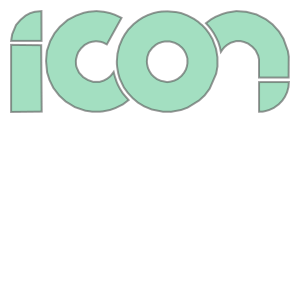

In [32]:
outline

In [33]:
sx,sy,bx,by = outline.bounds
print(sx,sy,bx,by)
rngx, rngy = bx-sx, by-sy
bx, by = round(rngx*1.2, -1)-sx,  round(rngy*1.2,-1)-sy
bx, by

0.0 0.0 1054.999942191448 382.921412844037


(1270.0, 460.0)

In [34]:
offx=bx*0.1
offy=by*0.1

In [35]:
outline = translate(outline, xoff=offx, yoff=offy)
outline.bounds

(127.0, 46.0, 1181.999942191448, 428.921412844037)

In [36]:
sx,sy,bx,by = outline.bounds
print(sx,sy,bx,by)
rngx, rngy = bx-sx, by-sy
bx, by = round(rngx*1.2, -1)-sx,  round(rngy*1.2,-1)-sy
bx, by

127.0 46.0 1181.999942191448 428.921412844037


(1143.0, 414.0)

In [37]:
#xs, ys = list(zip(*[p.centroid.xy for p in polys]))
#xs = [x[0] for x in xs]
#ys = [y[0] for y in ys]
#
#minx, miny = min(xs), min(ys)
#maxx, maxy = max(xs), max(ys)
#rngx, rngy = maxx-minx, maxy-miny
#bx, by = round(rngx*1.2, -1), round(rngy*1.2,-1)

In [38]:
sy, by

(46.0, 414.0)

654.4999710957242 237.46070642201846


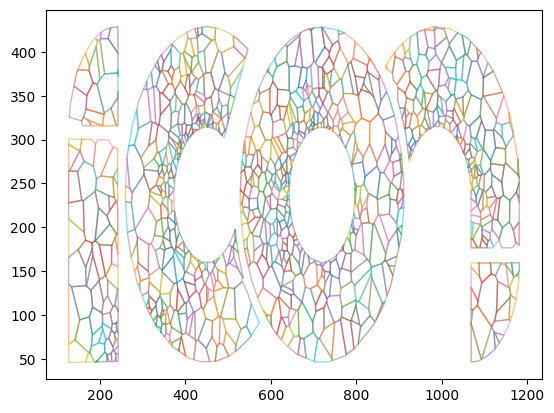

In [65]:
# Now, create a point-set, voronify it and clip to the elephane
fig = plt.figure()
bfield = np.array([rng.uniform(low=sx, high=bx+sx, size=600),
                   rng.uniform(low=sy, high=by+sy, size=600)]).T

eye = np.array([rng.normal(loc=295+offx, scale=5.0, size=50),
                rng.normal(loc=225+offy, scale=5.0, size=50)]).T

point1 = np.array([rng.normal(loc=360+offx, scale=10.0, size=250),
                   rng.normal(loc=275+offy, scale=10.0, size=250)]).T

point2 = np.array([rng.normal(loc=350+offx, scale=10.0, size=250),
                   rng.normal(loc=230+offy, scale=10.0, size=250)]).T

point3 = np.array([rng.normal(loc=200+offx, scale=30.0, size=250),
                   rng.normal(loc=250+offy, scale=30.0, size=250)]).T

point4 = np.array([rng.normal(loc=20+offx, scale=30.0, size=250),
                   rng.normal(loc=175+offy, scale=30.0, size=250)]).T

point5 = np.array([rng.normal(loc=40+offx, scale=5.0, size=250),
                   rng.normal(loc=105+offy, scale=15.0, size=250)]).T

point6 = np.array([rng.normal(loc=75+offx, scale=75.0, size=850),
                   rng.normal(loc=25+offy, scale=75.0, size=850)]).T

point7 = np.array([rng.normal(loc=150+offx, scale=15.0, size=250),
                   rng.normal(loc=75+offy, scale=15.0, size=250)]).T

point8 = np.array([rng.normal(loc=175+offx, scale=15.0, size=250),
                   rng.normal(loc=75+offy, scale=35.0, size=250)]).T

point9 = np.array([rng.normal(loc=230+offx, scale=15.0, size=150),
                   rng.normal(loc=65+offy, scale=25.0, size=150)]).T

point10 = np.array([rng.normal(loc=300+offx, scale=45.0, size=350),
                   rng.normal(loc=140+offy, scale=25.0, size=350)]).T

point11 = np.array([rng.normal(loc=390+offx, scale=45.0, size=350),
                   rng.normal(loc=140+offy, scale=45.0, size=350)]).T


dpoints = [bfield, eye, point1, point2, point3, point4, point5, point6, point7, point8, point9, point10, point11]

icon_bfield = np.array([rng.uniform(low=sx, high=bx+sx, size=600),
                   rng.uniform(low=sy, high=by+sy, size=600)]).T
icon_points_01 = np.array([rng.normal(loc=300, scale=45.0, size=350),
                          rng.normal(loc=25, scale=45.0, size=350)]).T
icon_points_02 = np.array([rng.normal(loc=450, scale=50.0, size=400),
                          rng.normal(loc=250, scale=50.0, size=400)]).T
icon_points_03 = np.array([rng.normal(loc=700, scale=50.0, size=400),
                          rng.normal(loc=250, scale=50.0, size=400)]).T
icon_points_04 = np.array([rng.normal(loc=1000, scale=50.0, size=400),
                          rng.normal(loc=250, scale=50.0, size=400)]).T
dpoints = [icon_bfield, icon_points_01, icon_points_02, icon_points_03, icon_points_04]
data = np.vstack(dpoints)
polys = voronify._voronoi_polygons_clip_to_outline(data, outline, 100, 10)

#for p in data:
#    plt.scatter(p[0], p[1], alpha=1.00)
for p in polys:
    x,y = p.exterior.xy
    plt.plot(x,y, lw=1, alpha=0.5)


In [66]:
len(polys)

897

In [67]:
sx,sy,bx,by, rngx, rngy

(127.0, 46.0, 1143.0, 414.0, 1054.999942191448, 382.921412844037)

In [68]:
# We can now define an (x,y) array whose contents are large enough to 
# host each individual shape.
# We now need a mapping that links each shape in the initial image, to one of the cells in the rectangular array
# Ideally, this mapping would be optimal such that line-crossings are reduced, and there remains a 1-1 relationship
# from source shapes to target shapes. 
# Another way of looking at it is that it's a mapping from one set of (xy) points to a second set of (xy) points
w,h = voronify.define_aspect(len(polys), 1.4)
padding_r = 0.2
target_lattice = []
for e in range(0,len(polys)):
    
    target_lattice.append((e % w, e // w))



target_lattice=[(((x/w)*rngx)+sx,((y/h)*rngy)+sy) for x,y in target_lattice]
target_lattice = np.array(target_lattice)
cell_w, cell_h = bx/w, by/h

start_points = np.array([(x,y) for p in polys for x,y in tuple(p.centroid.coords)])

In [69]:
CM = voronify._cost_matrix(start_points, target_lattice, metric="euclidean")
row_ind, col_ind = linear_sum_assignment(CM)
point_mapping = []
total_cost = 0.0

for i, j in zip(row_ind, col_ind):
    point_mapping.append((i, j))
    total_cost += CM[i, j]
mapped_target_points = [target_lattice[m[1]] for m in point_mapping]
mapped_target_points[0:5]

[array([420.0555395 , 413.60455633]),
 array([918.24995664, 153.2179956 ]),
 array([654.4999711 , 199.16856514]),
 array([1123.38883429,  398.28769982]),
 array([566.58330925, 137.90113908])]

In [70]:
offsets = mapped_target_points - start_points

In [71]:
target_polys=[]
scaling_factors = []
for e,p in enumerate(polys):
    tw,th = (abs(p.bounds[2]-p.bounds[0]), abs(p.bounds[3]-p.bounds[1]))
    over_w, over_h = cell_w - tw, cell_h - th
    if over_w < over_h:
        scale_dim = 0
    else:
        scale_dim = 1
    if (over_w, over_h)[scale_dim] < 0:
        # We need to apply scaling to the target layout, to reduce the size to fit the available cell
        scale_f = ((cell_w, cell_h)[scale_dim]/(tw, th)[scale_dim])
    else:
        #scale_f = 1.0
        scale_f = ((cell_w, cell_h)[scale_dim]/(tw, th)[scale_dim])
    scaling_factors.append(1/(scale_f))
    
    t_poly = scale(translate(p, xoff=offsets[e][0], yoff=offsets[e][1]), scale_f, scale_f)
    #affine_transform(p, [1, 0.0, 0.0, 1, offsets[e][0], offsets[e][1]]))
    target_polys.append(t_poly)


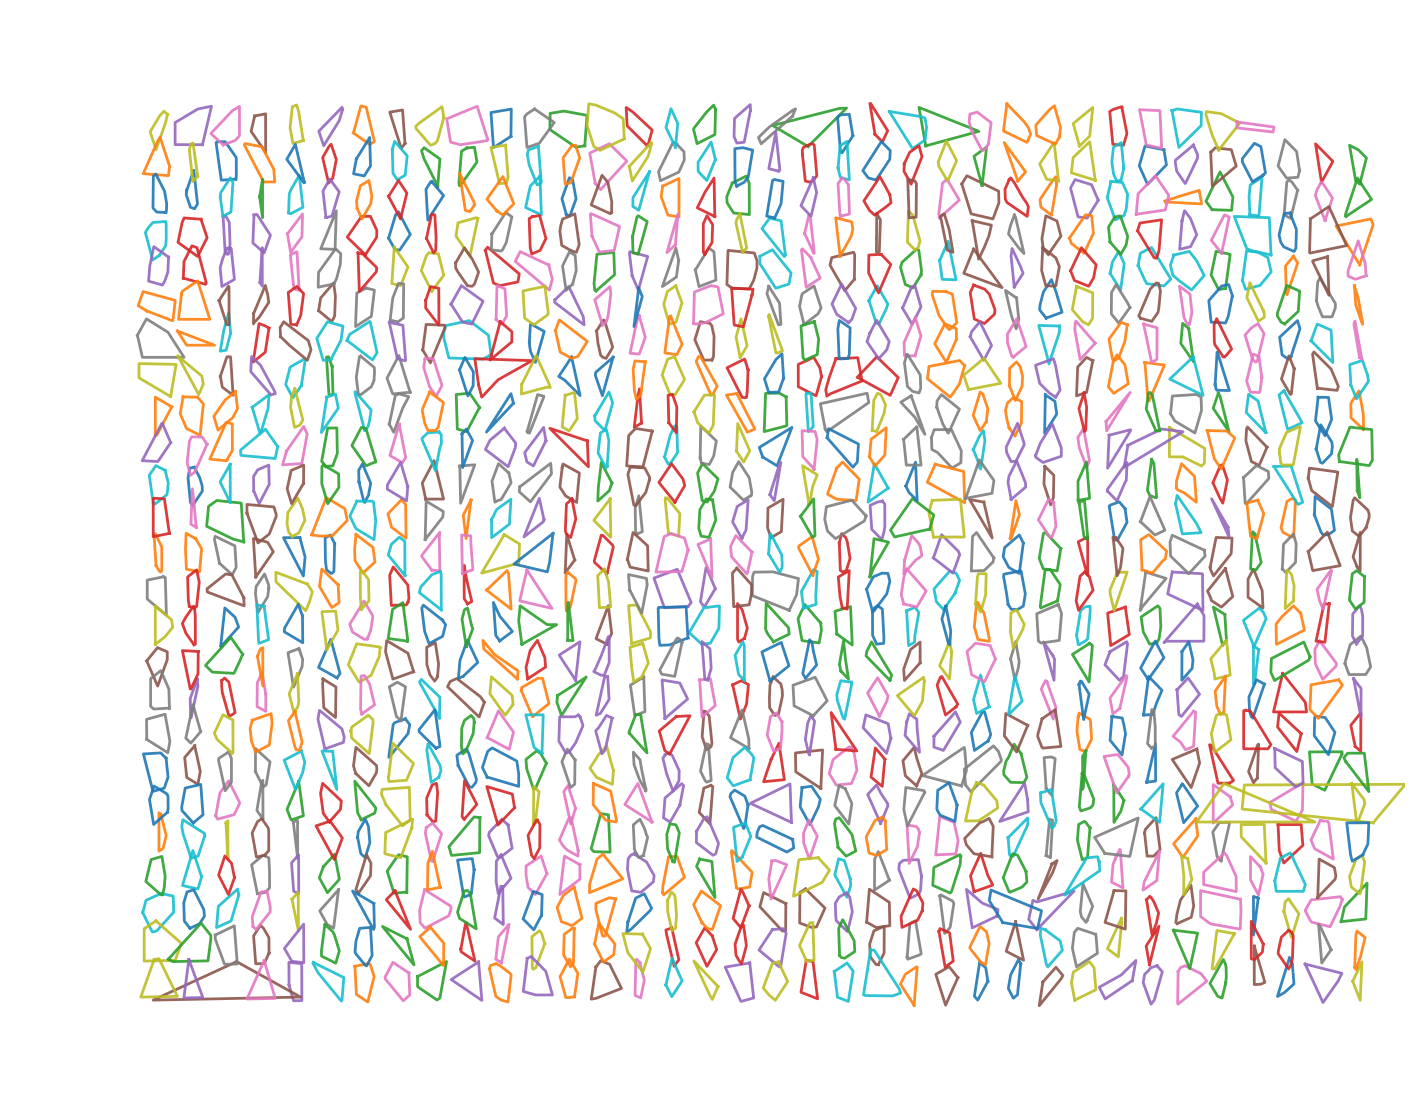

In [72]:
# Now, create a point-set, voronify it and clip to the elephane
fig = plt.figure(figsize=(18,14))
ax = plt.gca()
for t in target_polys:
    x,y = t.exterior.xy
    plt.plot(x,y, lw=2, alpha=0.9)
ax.set(xlim=[0,bx+50],ylim=[0,by+50])
ax.axes.set_axis_off()


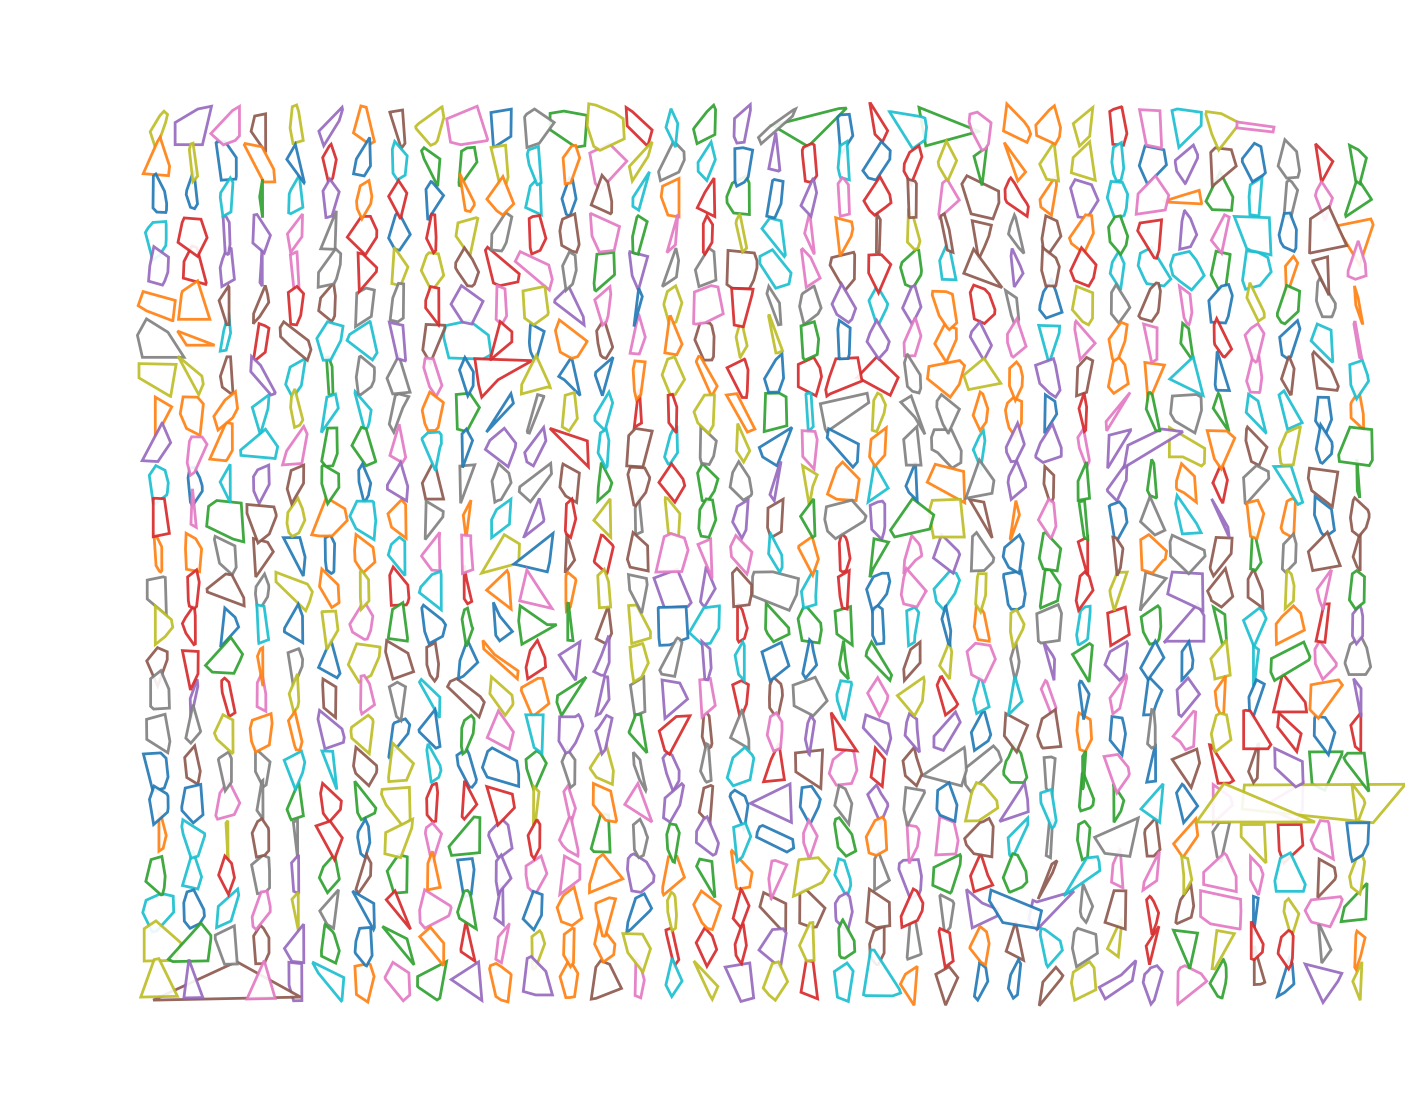

In [73]:
# Compute final positions
patches_list = []
trans_vectors = []          # (dx, dy) for each polygon

fig = plt.figure(figsize=(18,14))
ax = plt.gca()
#for i in range(len(polys)):
#    x,y = polys[i].exterior.xy
#    diagram = ax.plot(x,y, lw=5)

ax.set(xlim=[0,bx+50],ylim=[0,by+50])

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
c_cycle = cycle(colors)

for geom, tgt in zip(target_polys, start_points):
    # original centroid
    c0 = geom.centroid
    dx, dy = tgt[0] - c0.x, tgt[1] - c0.y
    trans_vectors.append((dx, dy))
    # initial patch (at original position)
    path = voronify.shapely_to_path(geom)
    patch = patches.PathPatch(path, facecolor='white', edgecolor=next(c_cycle), lw=2, alpha=0.9)
    ax.add_patch(patch)
    patches_list.append(patch)

ax.axes.set_axis_off()
# ----- 4. Animation function ------------------------------------------
def init():
    return patches_list


def animate(frame):
    """frame ∈ [0, n_frames-1]"""
    lt = frame / (n_frames - 1)          # normalised time [0,1]
    t = voronify.logit(lt, 1, 10, 0.5)
    for geom, (dx, dy), sf, patch in zip(target_polys, trans_vectors, scaling_factors, patches_list):
        scale_f = 1 + ((frame/(n_frames-1)) * (sf-1))
        #print(scale_f, (frame/n_frames) * (1/sf))
        moved = translate(scale(geom, scale_f, scale_f, origin='centroid'), xoff=dx * t, yoff=dy * t)
        patch.set_path(voronify.shapely_to_path(moved))
    return patches_list

# ----- 5. Run the animation --------------------------------------------
n_frames = 240
ani = animation.FuncAnimation(fig, animate, frames=n_frames,
                              init_func=init, blit=True, interval=50)

In [74]:
Writer = animation.HTMLWriter(fps=60, metadata=dict(artist='Me'), bitrate=1800)
ani.save("icon_polygons.html", writer=Writer)

In [75]:
Writer = animation.FFMpegWriter(fps=60, metadata=dict(artist='tkim'), bitrate=2400)
ani.save("icon_polygons.mp4", writer=Writer)

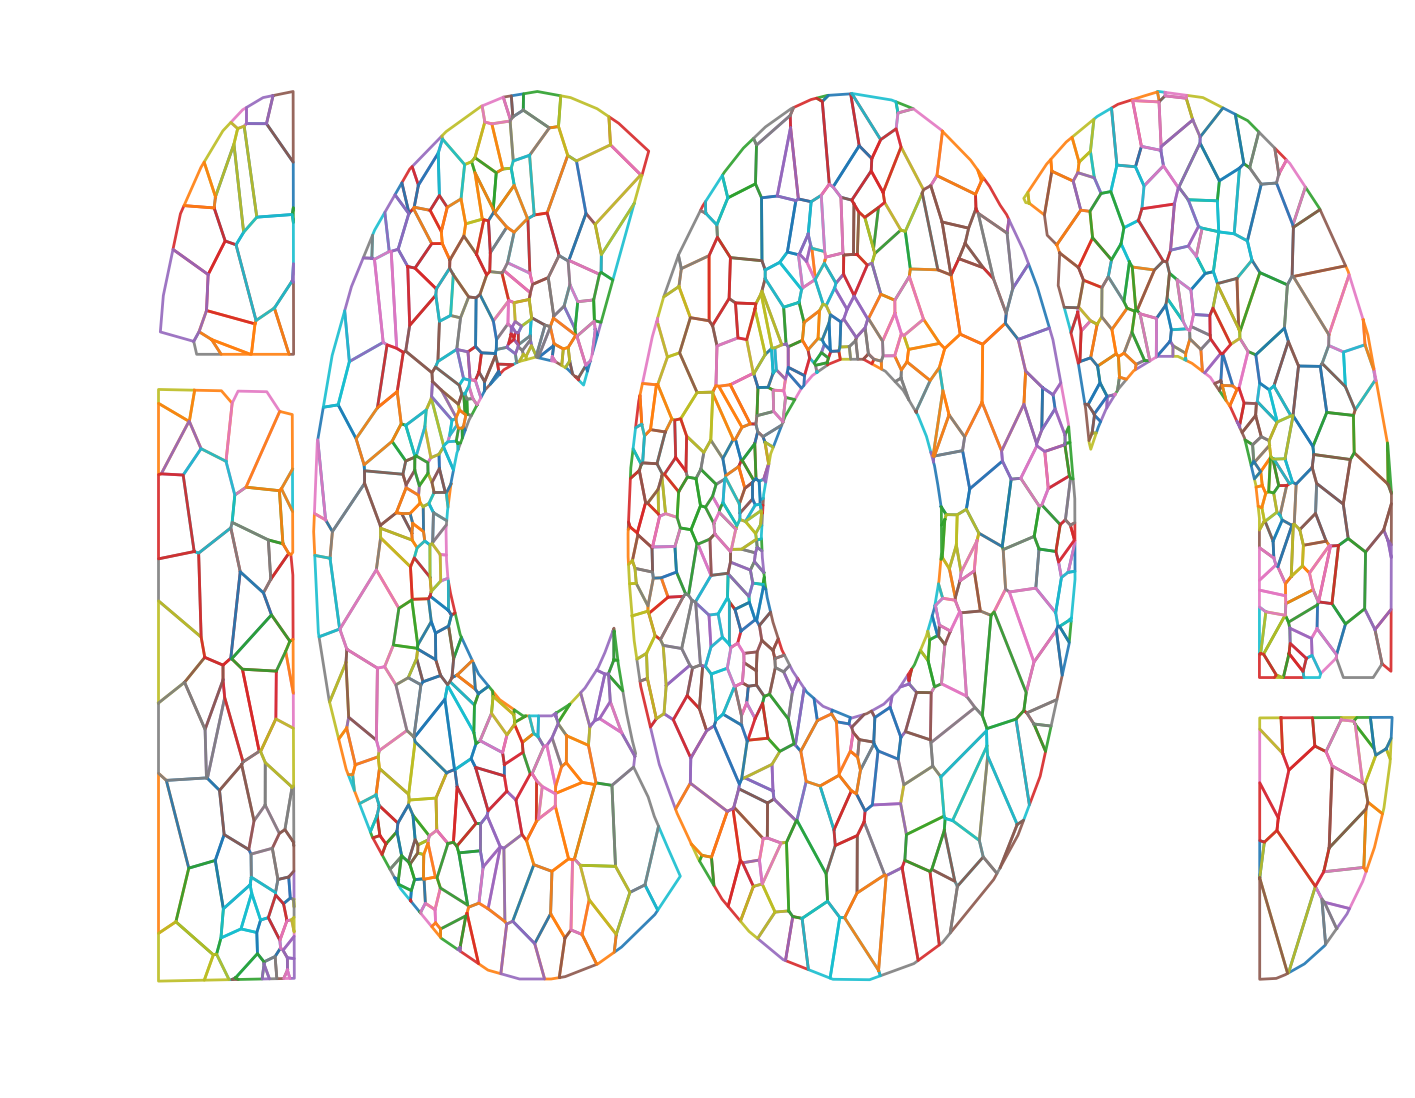

In [76]:
# Show the final frame
# Now, create a point-set, voronify it and clip to the elephane
fig = plt.figure(figsize=(18,14))
ax = plt.gca()
for t in polys:
    x,y = t.exterior.xy
    plt.plot(x,y, lw=2, alpha=0.9)
ax.set(xlim=[0,bx+50],ylim=[0,by+50])
ax.axes.set_axis_off()

